In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import seaborn as sns; sns.set()
from datetime import datetime,date

C:\Users\Gabriel Hidalgo\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


# Downloading all the Citi BikeTrips Files and combining them into one Pandas Dataframe

In [2]:
data1 = pd.read_csv('C:\\Users\\Gabriel Hidalgo\\PycharmProjects\\Maps\\nyc_citi\\201701-citibike-tripdata.csv')
data2 = pd.read_csv('C:\\Users\\Gabriel Hidalgo\\PycharmProjects\\Maps\\nyc_citi\\201702-citibike-tripdata.csv')
data3 = pd.read_csv('C:\\Users\\Gabriel Hidalgo\\PycharmProjects\\Maps\\nyc_citi\\201703-citibike-tripdata.csv')
data4 =pd.read_csv('C:\\Users\\Gabriel Hidalgo\\PycharmProjects\\Maps\\nyc_citi\\201704-citibike-tripdata.csv')
data5 =pd.read_csv('C:\\Users\\Gabriel Hidalgo\\PycharmProjects\\Maps\\nyc_citi\\201705-citibike-tripdata.csv')
data6 =pd.read_csv('C:\\Users\\Gabriel Hidalgo\\PycharmProjects\\Maps\\nyc_citi\\201706-citibike-tripdata.csv')
data7 =pd.read_csv('C:\\Users\\Gabriel Hidalgo\\PycharmProjects\\Maps\\nyc_citi\\201707-citibike-tripdata.csv')
data8 =pd.read_csv('C:\\Users\\Gabriel Hidalgo\\PycharmProjects\\Maps\\nyc_citi\\201708-citibike-tripdata.csv')
data9 =pd.read_csv('C:\\Users\\Gabriel Hidalgo\\PycharmProjects\\Maps\\nyc_citi\\201709-citibike-tripdata.csv')
data10 =pd.read_csv('C:\\Users\\Gabriel Hidalgo\\PycharmProjects\\Maps\\nyc_citi\\201710-citibike-tripdata.csv')
data11 =pd.read_csv('C:\\Users\\Gabriel Hidalgo\\PycharmProjects\\Maps\\nyc_citi\\201711-citibike-tripdata.csv')
data12 =pd.read_csv('C:\\Users\\Gabriel Hidalgo\\PycharmProjects\\Maps\\nyc_citi\\201712-citibike-tripdata.csv')

data = pd.concat([data1,data2,data3,data4,data5,data6,data7,data8,data9,data10,data11,data12],ignore_index=True,sort=False)

# Here is the Colors Pallette I am using for all my Graphs

In [6]:
colors=['#ff6666','#ff8c66','#ffb366','#ffcc66','#ffd966','#ffff66','#d9ff66','#b3ff66','#8cff66','#66ff66']

# Graph of the Distribution of Users of Citi Bike#

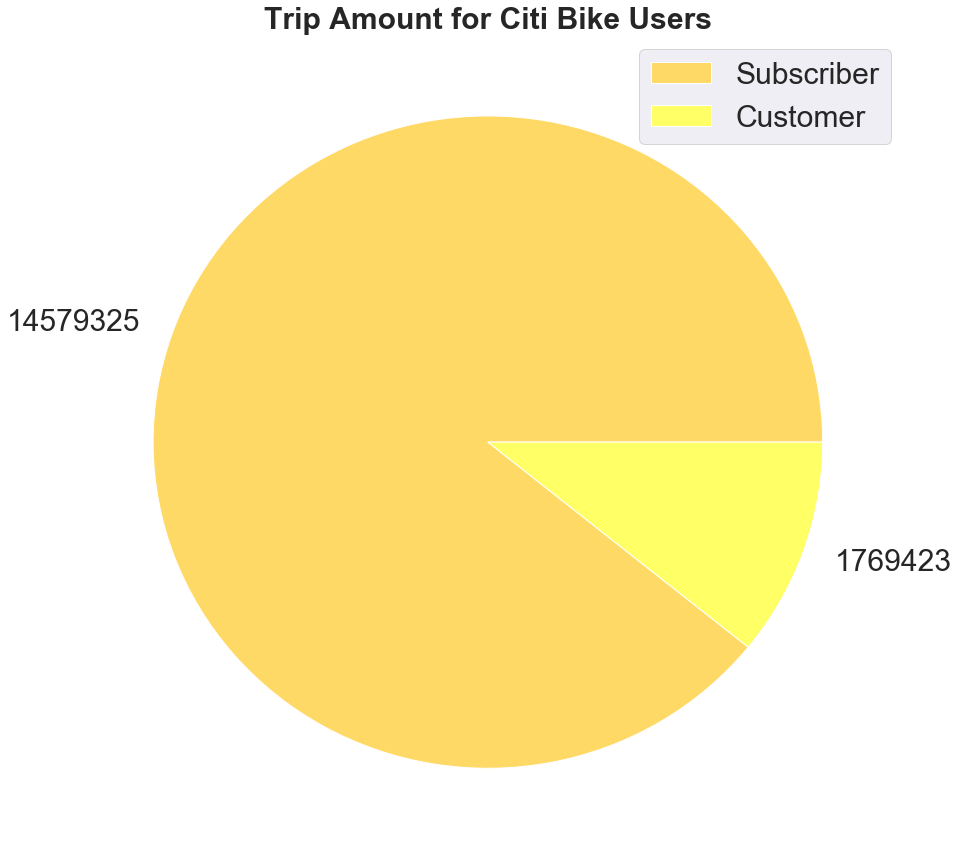

In [93]:
a =data['usertype'].value_counts()
a = a.rename_axis('Citi Bike User').reset_index(name='Amount')
sns.set(font_scale = 1.5)
plt.figure(figsize=(15,15))
plt.title('Trip Amount for Citi Bike Users',fontweight="bold",fontsize=30)
#plt.axis("equalfds")
plt.pie(a['Amount'],labels=a['Amount'] ,pctdistance = 1.1, labeldistance = 1.1,colors=colors[4:6],textprops={'fontsize': 30})
plt.legend(a['Citi Bike User'],fontsize=30)

# Creating a Dataframe that cleans and organizes the date column of the orginal dataframe to create Graphics also adding a dictionary for months name

In [142]:
time =data[['starttime','usertype']]
time['Hours']=pd.to_datetime(time['starttime']).dt.hour
time['Months']= pd.to_datetime(time['starttime']).dt.month
months={1:'Jan',2: 'Feb',3: 'Mar',4 : 'Apr',5 : 'May',6 : 'Jun',7 : 'July',8: 'Aug',9 : 'Sept',10 : 'Oct',11 : 'Nov',12 :'Dec'}

C:\Users\Gabriel Hidalgo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Gabriel Hidalgo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


# Graph of Users Type by the Month

C:\Users\Gabriel Hidalgo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Gabriel Hidalgo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5,0,'Months')

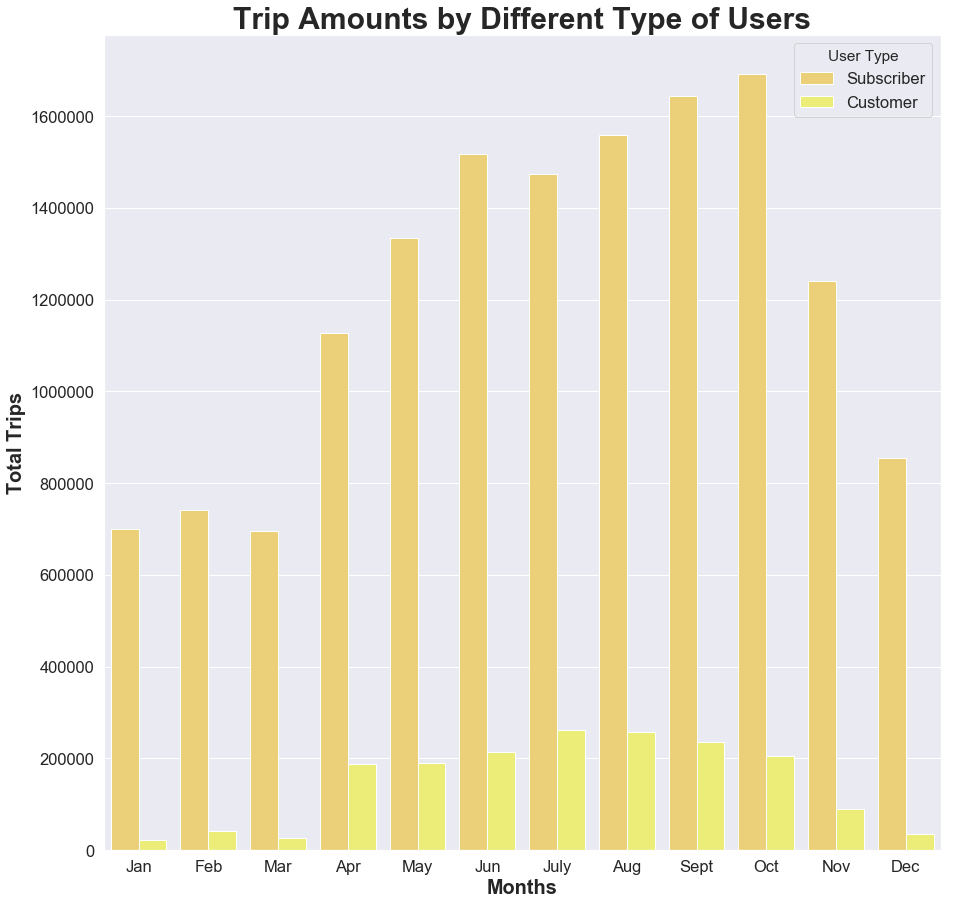

In [143]:
time['Months Names']=time['Months'].map(months) 
time['User Type']=time['usertype']
sns.set_style("whitegrid")
sns.set(font_scale = 1.5)
plt.figure(figsize=(15,15))
month= sns.countplot(time['Months Names'],hue=time['User Type'], palette=colors[4:6])
month.set_title('Trip Amounts by Different Type of Users',fontsize=30,fontweight="bold")
plt.ylabel('Total Trips',fontweight='bold',fontsize=20)
plt.xlabel('Months',fontweight='bold',fontsize=20)

# Creating a Heatmap that gives a more indept view by hour and month of when citi bike trips are being done.

C:\Users\Gabriel Hidalgo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Text(0.5,106.5,'Hours')

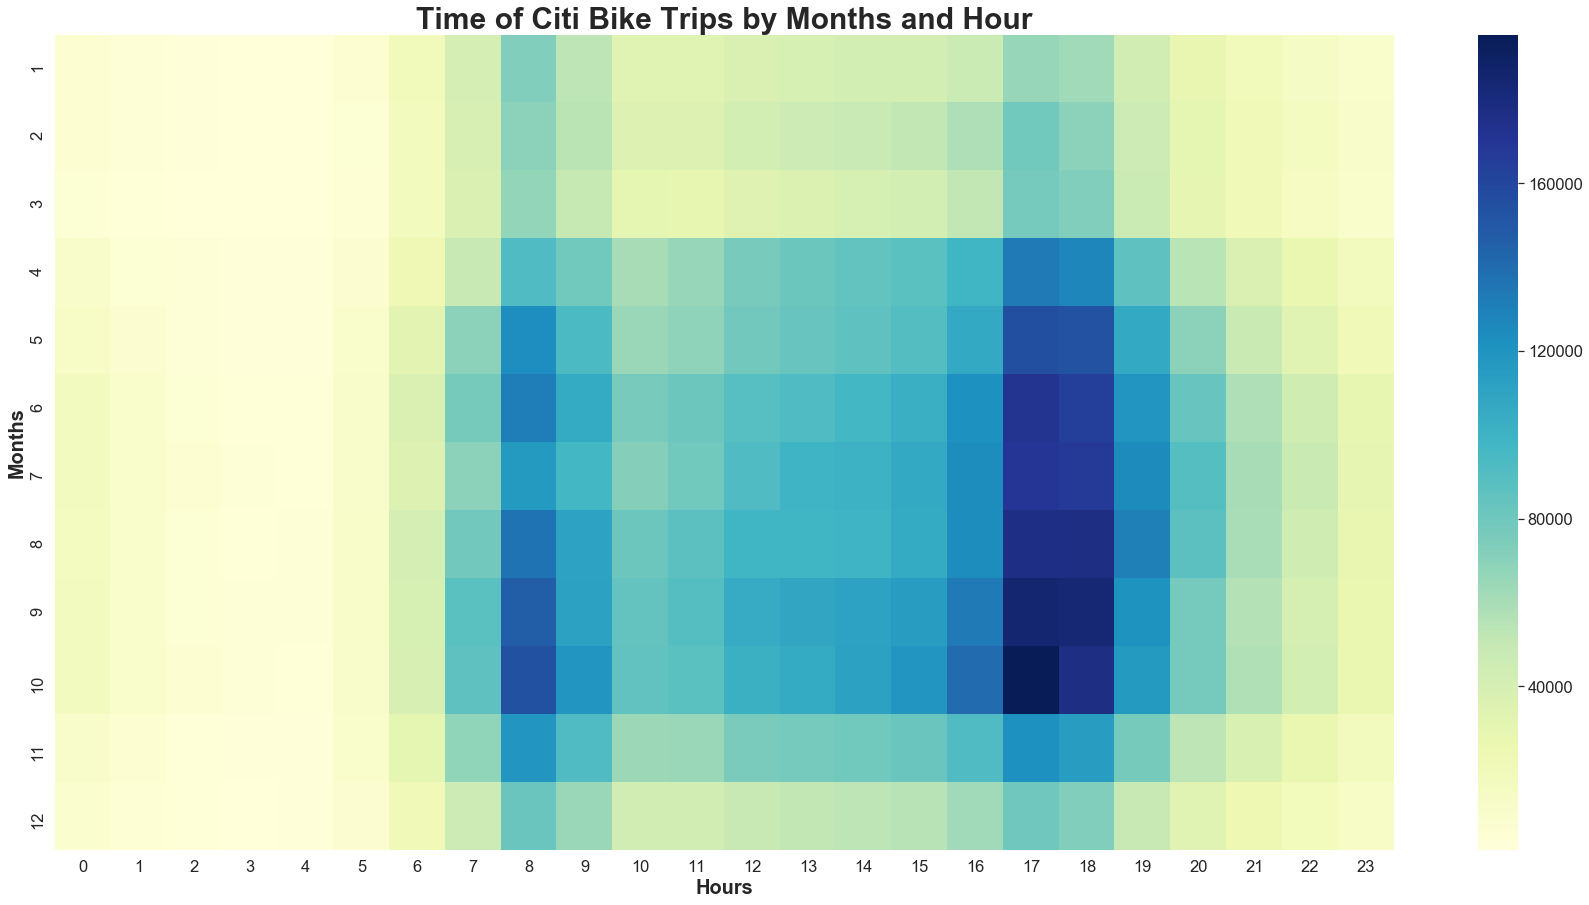

In [215]:
time['Months Names']=time['Months'].map(months) 
sns.set(font_scale = 1.5)
plt.figure(figsize=(30,15))
plt.title('Time of Citi Bike Trips by Months and Hour',fontweight="bold",fontsize=30)
hour= t.groupby(by=['Months','Hours']).count()['starttime'].unstack()
sns.heatmap(hour,cmap="YlGnBu")
plt.ylabel('Months',fontweight='bold',fontsize=20)
plt.xlabel('Hours',fontweight='bold',fontsize=20)

# Creating a new dataframe to start gathering all the data to form the folium map to anaylize citibike trips

In [155]:
route= data.groupby(['start station name','start station latitude','start station longitude','end station name','end station latitude','end station longitude']).size().reset_index(name = 'Number of Trips')
route= route.sort_values(['Number of Trips'], ascending=False)

# This dataframe are the Top 10 Routes to another Dock, and also the script to create this dataframe into a HTML table

In [171]:
x= route[route['start station name']!=route['end station name']]
x= x[:10]
x= x.reset_index(drop=True)
x= x.reset_index(drop=True)
#x.columns=['Dock Start','End Dock','Amount of Trips']
another= x[['start station name','end station name','Number of Trips']]
another.columns = ['Start Dock','End Dock','Amount of Trips']
table = another.to_html(index=False)
table=table.replace('\n','')
table

'<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th>Dock Start</th>      <th>End Dock</th>      <th>Amount of Trips</th>    </tr>  </thead>  <tbody>    <tr>      <td>Central Park S &amp; 6 Ave</td>      <td>5 Ave &amp; E 88 St</td>      <td>6318</td>    </tr>    <tr>      <td>12 Ave &amp; W 40 St</td>      <td>West St &amp; Chambers St</td>      <td>5403</td>    </tr>    <tr>      <td>W 21 St &amp; 6 Ave</td>      <td>9 Ave &amp; W 22 St</td>      <td>4831</td>    </tr>    <tr>      <td>E 7 St &amp; Avenue A</td>      <td>Cooper Square &amp; E 7 St</td>      <td>4561</td>    </tr>    <tr>      <td>Pershing Square North</td>      <td>Broadway &amp; W 32 St</td>      <td>4521</td>    </tr>    <tr>      <td>Pershing Square North</td>      <td>E 24 St &amp; Park Ave S</td>      <td>4403</td>    </tr>    <tr>      <td>West St &amp; Chambers St</td>      <td>12 Ave &amp; W 40 St</td>      <td>4335</td>    </tr>    <tr>      <td>Pershing Square North</td

# Now using Mapbox API I am creating predicated routes from the start and end of the trips from the dataframe above, and making those routes into one JSON script to be able to plot them into a folium map
To get Mapbox API key go to:https://www.mapbox.com/

In [14]:
from mapbox import Directions
import json


all={'type': 'FeatureCollection'}
all['features']=[]            
for i in range(0,len(x)):
    service = Directions(API Key)
    origin = {
        'type': 'Feature',
        'geometry': {
            'type': 'Point',
            'coordinates': [x.iloc[i]['start station longitude'],x.iloc[i]['start station latitude']]}}
    destination = {
        'type': 'Feature',
        'geometry': {
            'type': 'Point',
            'coordinates': [x.iloc[i]['end station longitude'],x.iloc[i]['end station latitude']]}}

    response = service.directions([origin, destination], 'mapbox/cycling')
    z = response.geojson()
    
    z['features'][0].update({'ID':i})
    z['features'][0].update({'route':str(x.iloc[i]['start station name'])})
    z['features'][0].update({'trip amount':str(x.iloc[i]['Number of Trips'])})
    all['features'].append(z['features'][0])

def flip_geojson_coordinates(geo):
        if isinstance(geo, dict):
            for k, v in geo.items():
                if k == "coordinates":
                    q = np.asarray(geo[k])
                    f = q.flatten()
                    geo[k] = np.dstack((f[1::2], f[::2])).reshape(q.shape).tolist()
                else:
                    flip_geojson_coordinates(v)
        elif isinstance(geo, list):
            for k in geo:
                flip_geojson_coordinates(k)
    

for feature in all['features']:
    feature = flip_geojson_coordinates(feature)

# This dataframe are the Top 10 Routes to the same Dock, and also the script to create this dataframe into a HTML table

In [210]:
y= route[route['start station name']==route['end station name']]
y=y[:10].reset_index(drop=True)
y= y.reset_index()
y = y[['end station name','end station latitude','end station longitude','Number of Trips']]
y.columns = ['station','lat','long','Number of Trips']
same = y[['station','Number of Trips']]
same.columns = ['Dock','Amount of Trips']
table_2= same.to_html(index=False)
table_2=table_2.replace('\n','')
table_2

'<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th>Dock</th>      <th>Amount of Trips</th>    </tr>  </thead>  <tbody>    <tr>      <td>Central Park S &amp; 6 Ave</td>      <td>7169</td>    </tr>    <tr>      <td>Grand Army Plaza &amp; Central Park S</td>      <td>5670</td>    </tr>    <tr>      <td>Centre St &amp; Chambers St</td>      <td>4718</td>    </tr>    <tr>      <td>Greenwich Ave &amp; Charles St</td>      <td>4239</td>    </tr>    <tr>      <td>Soissons Landing</td>      <td>3773</td>    </tr>    <tr>      <td>Yankee Ferry Terminal</td>      <td>3715</td>    </tr>    <tr>      <td>12 Ave &amp; W 40 St</td>      <td>3291</td>    </tr>    <tr>      <td>West Drive &amp; Prospect Park West</td>      <td>3219</td>    </tr>    <tr>      <td>5 Ave &amp; E 73 St</td>      <td>3137</td>    </tr>    <tr>      <td>West St &amp; Chambers St</td>      <td>3025</td>    </tr>  </tbody></table>'

# Finally, this dataframe is the location of the docks where these trips occured

In [87]:
stations_1= x[['start station name', 'start station latitude',
       'start station longitude',]]
stations_2 = x[['end station name', 'end station latitude',
       'end station longitude']]
stations_3 = y[['station','lat','long',]]
stations_1.columns = ['station','lat','long']
stations_2.columns = ['station','lat','long']
station= stations_1.append(stations_2).append(stations_3)

# This is the color bar that I will add to the folium map

In [153]:
import branca.colormap as cm
from branca.colormap import linear

x_dict = x.set_index('index')['Number of Trips']
y_dict = y.set_index('station')['Number of Trips']

color = cm.LinearColormap(colors=(colors[0],colors[3],colors[5]), index=[3000,5250,7500],vmin=3000,vmax=7500)
color

# Finally, I am adding all the elements above to create the folium map that shows the type of trips

In [231]:
import folium


map = folium.Map(location=[40.7128,-74.0060],zoom_start=13, tiles = "Stamen Toner")


routes = folium.FeatureGroup(name = 'Trips to Another Dock')

routes.add_child(folium.GeoJson(all,
    style_function=lambda features: {
        'fillColor': color(x_dict[features['ID']]),
        'color': color(x_dict[features['ID']]),
        'weight': '8',
        'dashArray': '1,10 '
    }
))

for i in range(0,len(x)):
        
    popup = """<center>
                        <font size='4' style="font-family:'Raleway', sans-serif;"><b>Dock</b></font><br>
                        <font size='2' style="font-family:'Raleway', sans-serif;">{}</font><br>
                        """
    icon = folium.features.CustomIcon("https://www.gabrielhn.com/static/images/citi_graph/pics/start.png",
                                      icon_size=(15, 15))
    
    popup_text = popup.format(str(x.iloc[i]['start station name']))
    iframe = folium.IFrame(popup_text, width=200, height=67)
    popup = folium.Popup(iframe, max_width=400)
    routes.add_child(folium.Marker([x.iloc[i]['start station latitude'],x.iloc[i]['start station longitude']],icon=icon,
                 popup=popup))

map.add_child(routes)


for i in range(0,len(x)):
        
    popup_text = """<center>
                        <font size='4' style="font-family:'Raleway', sans-serif;"><b>Dock</b></font><br>
                        <font size='2' style="font-family:'Raleway', sans-serif;">{}</font><br>
                        """
    icon = folium.features.CustomIcon("https://www.gabrielhn.com/static/images/citi_graph/pics/end.png",
                                      icon_size=(10, 10))
    
    popup_text = popup_text.format(str(x.iloc[i]['end station name']))
    iframe = folium.IFrame(popup_text, width=200, height=75)
    popup = folium.Popup(iframe, max_width=400)
    routes.add_child(folium.Marker([x.iloc[i]['end station latitude'],x.iloc[i]['end station longitude']],icon=icon,
                 popup=popup))


map.add_child(routes)

same = folium.FeatureGroup(name = 'Trips to Same Dock',show=False)

for i in range(0,len(y)):
    popup_text = """<center>
                        <font size='4' style="font-family:'Raleway', sans-serif;"><b>Dock</b></font><br>
                        <font size='2' style="font-family:'Raleway', sans-serif;">{}</font><br>
                        """
    
    popup_text = popup_text.format(str(y.iloc[i]['station']))
    iframe = folium.IFrame(popup_text, width=200, height=75)
    popup = folium.Popup(iframe, max_width=400)
    same.add_child(folium.CircleMarker([y.iloc[i]['lat'],y.iloc[i]['long']],
                        fill=True,
                        color=str(color(y.iloc[i]['Number of Trips'])),popup=popup))


map.add_child(same)
    
color.add_to(map)
folium.LayerControl().add_to(map)
map.save('routes.html')
map